## Week 3: Geospatial Data Analysis and GeoPandas

- Section 401
- Sep 18, 2023

## Housekeeping

- [Homework #1](https://github.com/MUSA-550-Fall-2023/assignment-1) due on Wednesday (9/20)
- [Homework #2](https://github.com/MUSA-550-Fall-2023/assignment-2) will be assigned Wednesday 
- Choose a dataset to visualize and explore
    - [OpenDataPhilly](https://opendataphilly.org) or one your choosing
    - Email me if you want to analyze one that's not on OpenDataPhilly

## Agenda for Week #3

- Vector data and introduction to GeoPandas
- Spatial relationships and joins
- Visualization for geospatial data
- Demo: 311 requests by neighborhood in Philadelphia
- Exercise: Property assessments by neighborhood

In [38]:
# Let's setup the imports we'll need first

import altair as alt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Now, on to geospatial analysis...

## Vector data

- **Vector** refers to **discrete geometric entities**
- The [Open Geospatial Consortium](https://en.wikipedia.org/wiki/Open_Geospatial_Consortium) has standardized a set of [**simple features**](https://en.wikipedia.org/wiki/Simple_Features)
- Includes points, lines, and polygons

<center>
    <img src="imgs/simple-features.png" width=600></img>
</center>

[Source](https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/)

### A couple of terminology notes

- A **feature** refers to both the geometry and attributes of specific piece of vector data
- A **feature collection** is a list, or collection, of features

Both terms are very common in Python geospatial software.

### Common formats for vector datasets

#### A shapefile

Actually several files with the same common prefix.

Mandatory files: 

- **.shp**: the file containing the geometries
- **.shx**: the file that indexes the geometry
- **.dbf**: tabular data format storing the attributes for each geometry
    
And many optional files for documentation, projection information, etc.

Let's take a look at an example shapefile:

We'll use the `%ls` command to *list* out all of the files in an example shapefile in the `data/` folder

In [3]:
%ls "data/ne_110m_admin_0_countries/"

ne_110m_admin_0_countries.cpg  ne_110m_admin_0_countries.shp
ne_110m_admin_0_countries.dbf  ne_110m_admin_0_countries.shx
ne_110m_admin_0_countries.prj


#### The GeoJSON file

- Stores simple features in a JSON format
- Arose due to the prevalence of the JSON format, especially on the web

<center>
    <img src="imgs/geojson-format.png" width=600></img>
</center>

::: {.callout-note title="Additional GeoJSON resources"}
- GitHub lets you view GeoJSON files natively. See [Philadelphia ZIP Codes](https://github.com/MUSA-550-Fall-2023/week-3/blob/main/data/Zipcodes_Poly.geojson) in the `data/` folder of this week's repo.
- http://geojson.io provides interactive creation and viewing of small GeoJSON files
:::

## Working with vector data in Python: GeoPandas

`geopandas` provides a simple, intuitive for the main types of geospatial vector file formats

![](imgs/geopandas-logo.jpeg){width=600}

In [10]:
# The import statement
import geopandas as gpd

**Example:** Let's load a shape file of countries in the world...

[Source: Natural Earth Data](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)

We can use the [read_file()](https://geopandas.org/docs/reference/api/geopandas.read_file.html) function to read shapefiles and GeoJSON files.

In [16]:
# Read the shape file, giving the name of the directory
countries = gpd.read_file("./data/ne_110m_admin_0_countries")

In [17]:
countries.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-66.95992 -54.89681, -67.56244..."


In [18]:
type(countries)

geopandas.geodataframe.GeoDataFrame

### What's a `GeoDataFrame`?

Just like a `DataFrame` but with a new, special `geometry` column:

<img src="imgs/geodataframe.svg"/>

In [19]:
# Print out the first 10 entires of the "geometry" column
countries["geometry"].head(n=10)

0    POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1    MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -...
2    POLYGON ((21.02004 40.84273, 20.99999 40.58000...
3    POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4    MULTIPOLYGON (((-66.95992 -54.89681, -67.56244...
5    POLYGON ((43.58275 41.09214, 44.97248 41.24813...
6    MULTIPOLYGON (((-59.57209 -80.04018, -59.86585...
7    POLYGON ((68.93500 -48.62500, 69.58000 -48.940...
8    MULTIPOLYGON (((145.39798 -40.79255, 146.36412...
9    POLYGON ((16.97967 48.12350, 16.90375 47.71487...
Name: geometry, dtype: geometry

### We can still leverage the power of `pandas`...

Calculate the total world population:

In [20]:
countries["pop_est"].sum() / 1e9  # In billions

7.383089462

Calculate the total population on each continent:

In [21]:
grouped = countries.groupby("continent")
grouped

::: {.callout-note title="Remember"}

The `groupby()` function does not return a `DataFrame` — you need to call `sum()`, `mean()` etc, or `apply()` a function to get your desired result!

:::

In [22]:
# Sum population on each continent
pop_by_continent = grouped["pop_est"].sum()

# Sort values
pop_by_continent.sort_values(ascending=False, inplace=True)

# Output sorted values from cell
pop_by_continent / 1e9

continent
Asia                       4.389145e+00
Africa                     1.219176e+00
Europe                     7.463985e-01
North America              5.730421e-01
South America              4.185407e-01
Oceania                    3.678284e-02
Antarctica                 4.050000e-06
Seven seas (open ocean)    1.400000e-07
Name: pop_est, dtype: float64

Filter the data frame based on a boolean selection:

In [26]:
# Is the country name USA?
is_USA = countries["name"] == "United States of America"

# Get the row with USA
USA = countries.loc[is_USA]

USA

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
168,USA,United States of America,North America,326625791.0,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


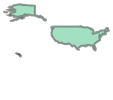

In [27]:
USA.squeeze().geometry

::: {.callout-note title="Remember"}

The `squeeze()` function does just one it sounds like: if you have a DataFrame with only one row, it will "squeeze" the row dimension by removing it, returning just a Series object:

:::

In [31]:
# Squeeze
USA = USA.squeeze()

# Print out the types
print("The type of USA is: ", type(USA))

# Output
USA

The type of USA is:  <class 'pandas.core.series.Series'>


iso_a3                                                      USA
name                                   United States of America
continent                                         North America
pop_est                                             326625791.0
gdp_md_est                                           18560000.0
geometry      MULTIPOLYGON (((-122.84000000000005 49.0000000...
Name: 168, dtype: object

The simple features (Lines, Points, Polygons) are implemented by the [shapely](https://shapely.readthedocs.io/en/stable/manual.html) library

In [32]:
type(USA.geometry)

shapely.geometry.multipolygon.MultiPolygon

JupyterLab renders `shapely` geometries automatically:

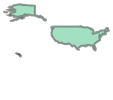

In [34]:
# a mini USA
USA.geometry

### How does `geopandas` handle coordinate systems and map projections?

A **coordinate reference system** (CRS) relates the position of a geometry object on the spherical earth to its two-dimensional coordinates.

A `GeoDataFrame` or `GeoSeries` has a `.crs` attribute which specifies the coordinate reference system.

In [36]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### The EPSG=4326 CRS

- EPSG 4326 is known as WGS 84 where `x` and `y` are longitude and latitude. 
- It is is the default coordinate system for GPS systems.
- It's also known as *Plate Carrée* or *equirectangular*

### How to plot all of the geometries at once?

Use the `plot()` function to get a quick and dirty plot of all of the geometry features.

**Note:** the `plot()` returns the current maplotlib axes, allowing you to format the chart after plotting.

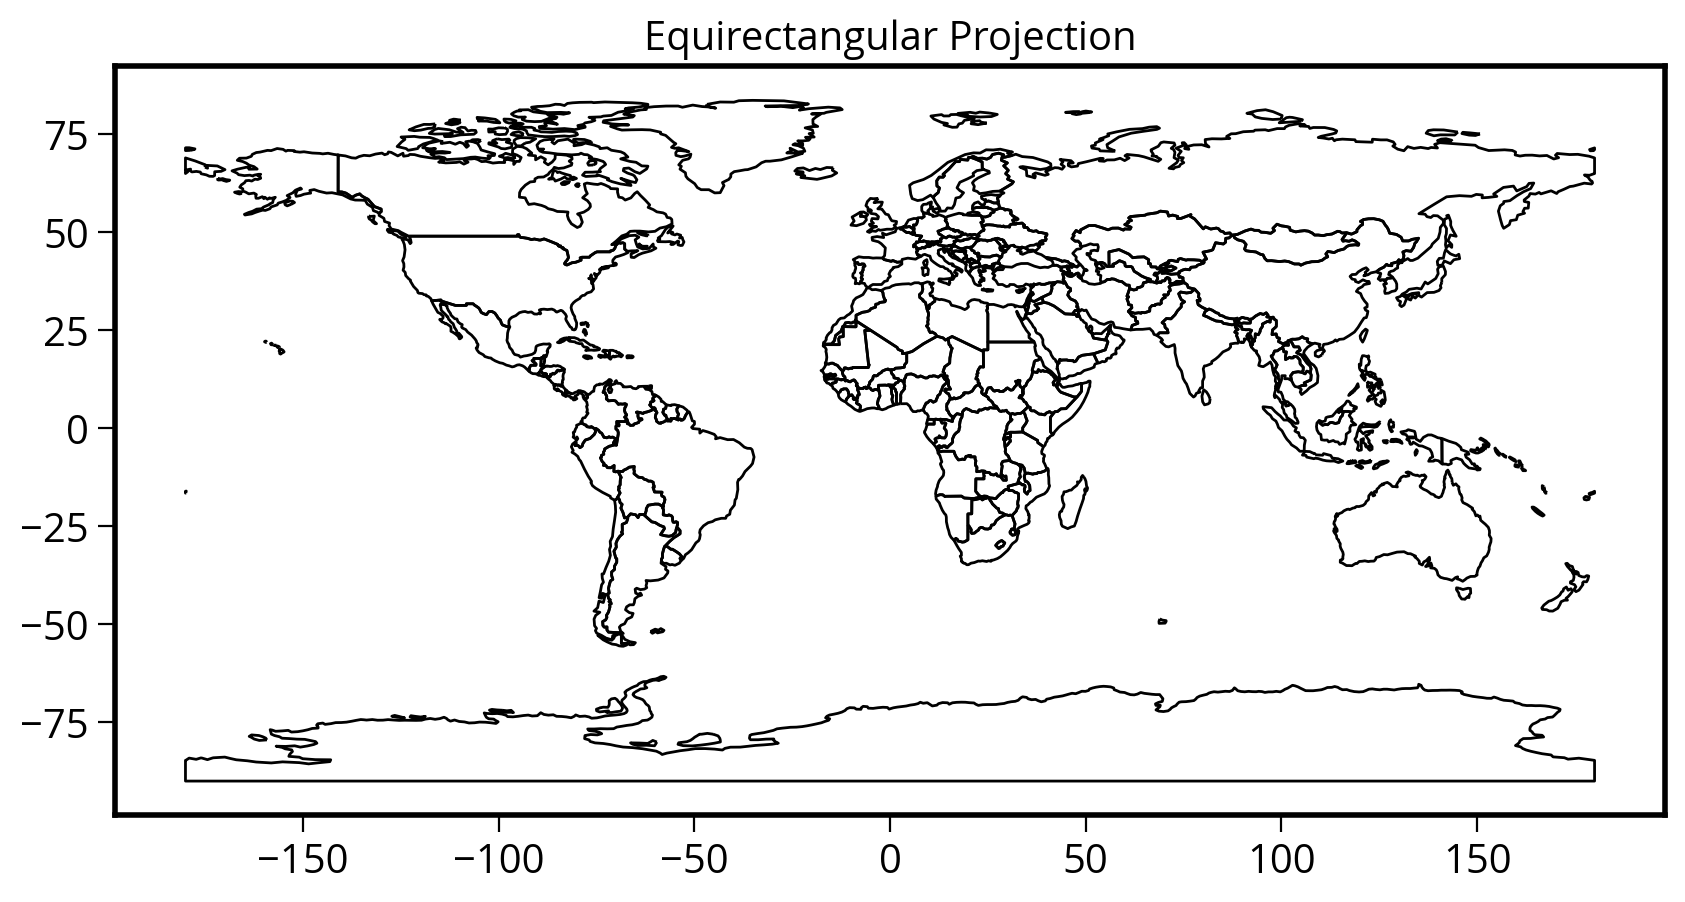

In [40]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the countries on our axes
ax = countries.plot(ax=ax, facecolor="none", edgecolor="black")

# Add a title
ax.set_title("Equirectangular Projection");

<center>
    <img src="imgs/equirectangular.png" width=700></img>
</center>

### How about an interactive map?

Use the `gdf.explore()` function!

In [101]:
countries.explore()

### Can we convert to other coordinate systems?

Use the `df.to_crs()` function! The most well-known projections can be specified by their EPSG code.

Geopandas documentation on re-projecting: [Managing Projections](https://geopandas.org/projections.html#re-projecting)

#### Let's convert to the Mercator projection

[EPSG code: 3395](http://spatialreference.org/ref/epsg/wgs-84-world-mercator/)

In [41]:
# Remove Antartica, as the Mercator projection
# cannot deal with the poles
no_antartica = countries.loc[(countries["name"] != "Antarctica")]

In [42]:
# Two ways to specify the EPSG code
countries_mercator = no_antartica.to_crs(epsg=3395)

# Alternatively:
# countries_mercator = no_antartica.to_crs("EPSG:3395")

In [43]:
countries_mercator.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AFG,Afghanistan,Asia,34124811.0,64080.0,"POLYGON ((6813956.990 4227673.562, 6927484.435..."
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((2660998.216 -1305442.810, 2680..."
2,ALB,Albania,Europe,3047987.0,33900.0,"POLYGON ((2339940.185 4961221.199, 2337708.178..."
3,ARE,United Arab Emirates,Asia,6072475.0,667200.0,"POLYGON ((5741805.754 2765811.385, 5761611.935..."
4,ARG,Argentina,South America,44293293.0,879400.0,"MULTIPOLYGON (((-7453944.198 -7306880.704, -75..."


::: {.callout-tip }
Take a look at the values in the "geometry" column above. The magnitude of the coordinates changed! This is a quick and easy way to tell if the re-projection worked properly!
:::

#### Now let's plot it!

The easy way...with geopandas built-in `plot()` function

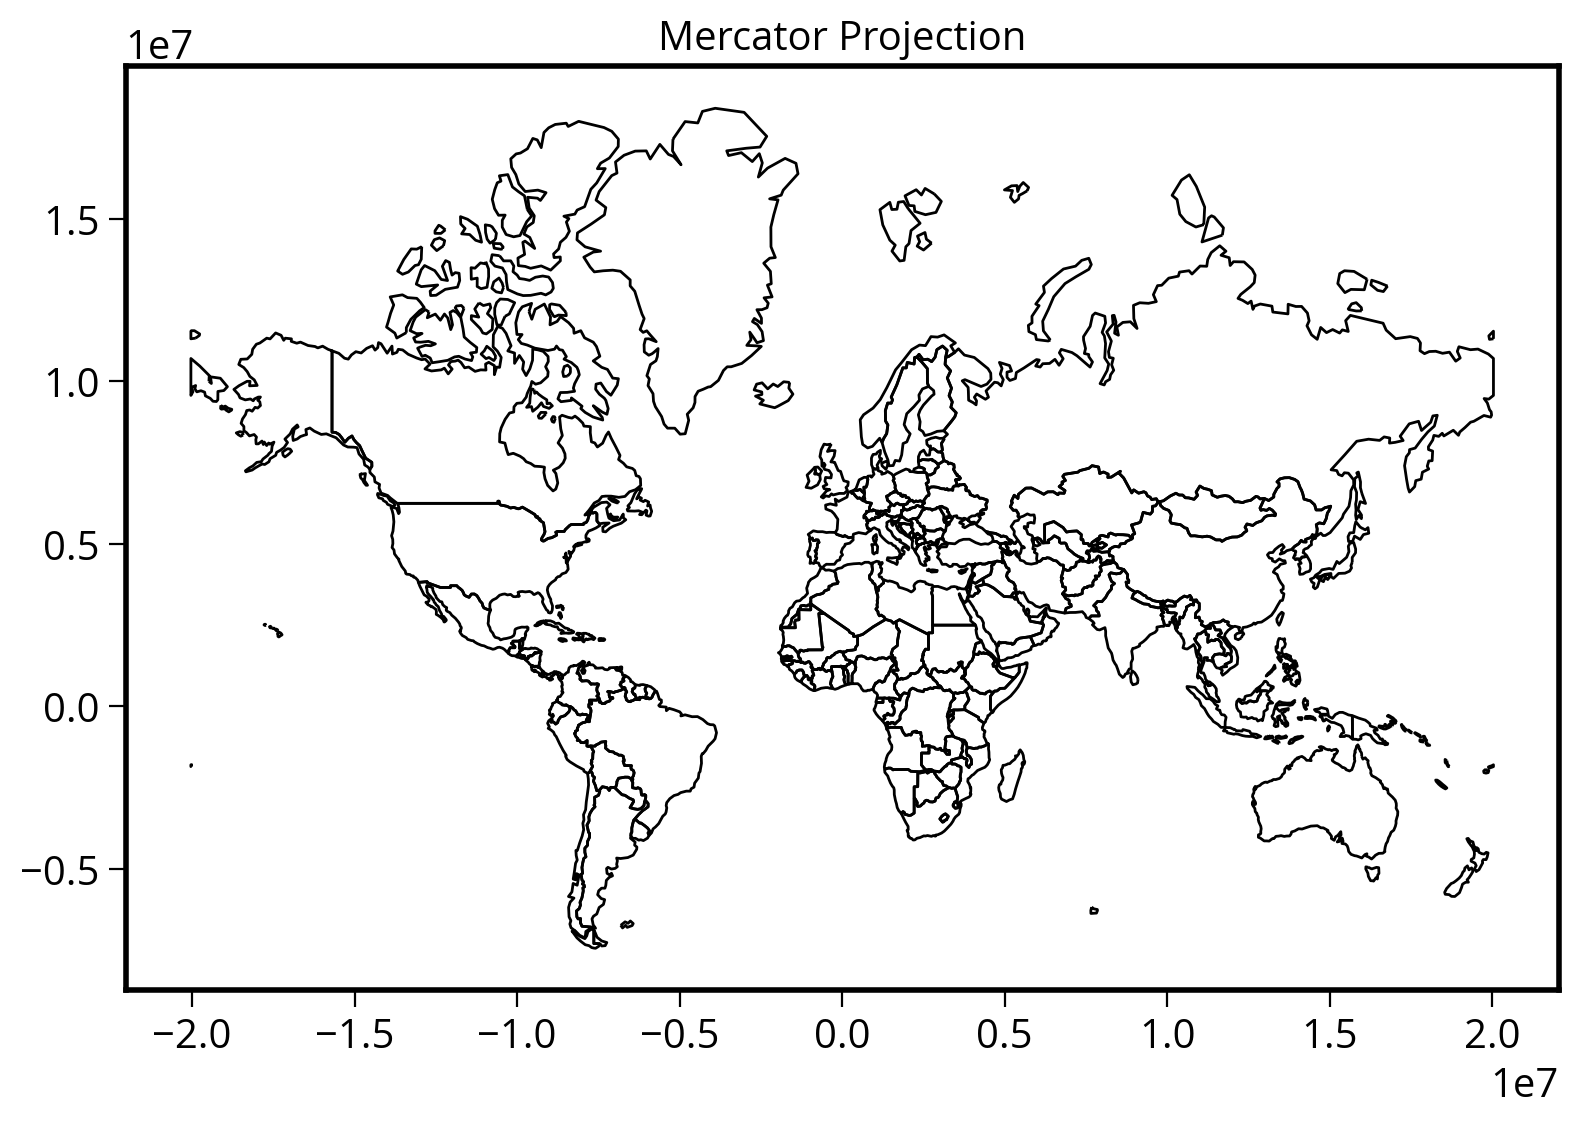

In [44]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Use built-in plot() of the GeoDataFrame
ax = countries_mercator.plot(ax=ax, facecolor="none", edgecolor="black")

# Add a title
ax.set_title("Mercator Projection");

<center>
    <img src="imgs/mercator.png" width=500></img>
</center>
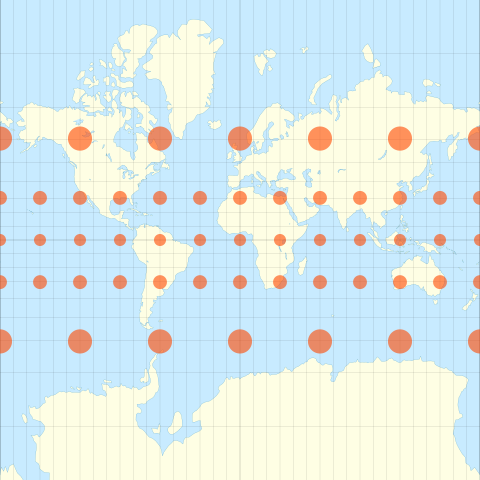

#### Which one is your favorite?


![](https://imgs.xkcd.com/comics/map_projections.png)

[Source: xkcd](https://xkcd.com/977/)

::: {.callout-tip title="Tip: Choosing the right CRS"}

- For city-based data, the Web Mercator CRS ([EPSG=3857](https://epsg.io/3857)) is best. This CRS became popular after Google Maps adopted it.
- You can also use a CRS specific to individual states, e.g., the [PA State Plane EPSG=2272](https://epsg.io/2272) is a good option for Philadelphia
:::

### Let's load the city limits for Philadelphia

We'll use the provided `City_Limits` shape file in the `data/` folder

In [45]:
city_limits = gpd.read_file("./data/City_Limits")

city_limits

,OBJECTID,Shape__Are,Shape__Len,geometry
0,1,0.038911,1.259687,"POLYGON ((-75.01497 40.13793, -75.01456 40.137..."


#### What's the CRS?

Use the `.crs` attribute to find out!

In [46]:
city_limits.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Plot it with the EPSG=4326 CRS:

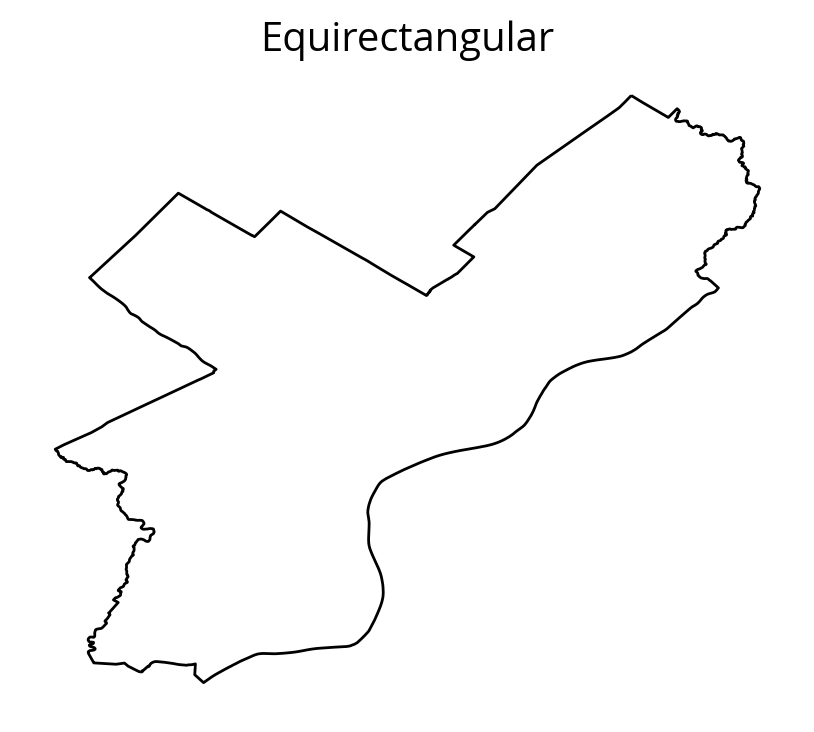

In [49]:
# Create our figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Plot
city_limits.plot(ax=ax, facecolor="none", edgecolor="black")

# Format
ax.set_title("Equirectangular")
ax.set_axis_off()  # This will remove the axes completely
ax.set_aspect("equal")  # This forces an equal aspect ratio

This is *not* what Philadelphia looks like..

Let's try EPSG=3857 instead:

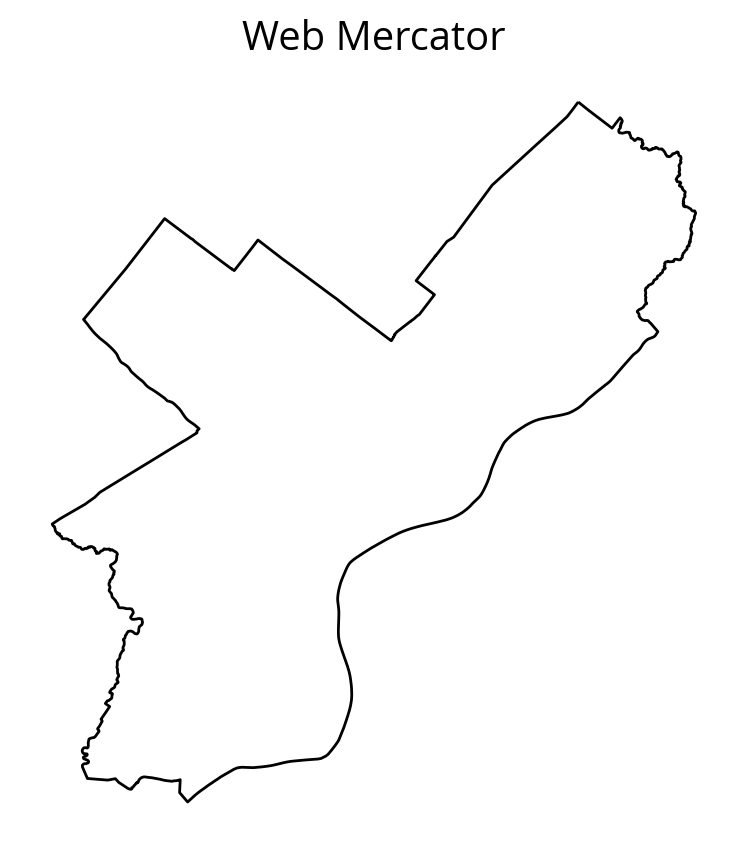

In [50]:
# Create the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Convert to EPSG:3857
city_limits_3857 = city_limits.to_crs(epsg=3857)

# Plot and format
city_limits_3857.plot(ax=ax, facecolor="none", edgecolor="black")

ax.set_title("Web Mercator")
ax.set_axis_off()
ax.set_aspect("equal");

::: {.callout-warning title="Important"}

The equirectangular CRS (EPSG=4326) is often used by default and will make cities appear wider and flatter than they really are.

:::

#### Saving GeoDataFrames


Use the `to_file()` function and specify the driver.

In [51]:
# ESRI shape file
city_limits_3857.to_file("./data/city_limits_3857", driver="ESRI Shapefile")

In [52]:
# GeoJSON is also an option
city_limits_3857.to_file("./data/city_limits_3857.geojson", driver="GeoJSON")

#### How about as a CSV file?

Yes, but reading requires more work...

In [60]:
# save a csv file
city_limits_3857.to_csv("./data/city_limits_3857.csv", index=False)

In [61]:
df = pd.read_csv("./data/city_limits_3857.csv")
df.head()

,OBJECTID,Shape__Are,Shape__Len,geometry
0,1,0.038911,1.259687,"POLYGON ((-8350627.97509646 4886006.88680784, ..."


#### Looks similar...

**But,** the "geometry" column is just stored as a string...it's not a shapely Polygon

In [62]:
type(df.geometry)

pandas.core.series.Series

#### Use `shapely` to parse the string version of the polygons

In [63]:
from shapely import wkt

# wkt.loads will convert from string to Polygon object
df["geometry"] = df["geometry"].apply(wkt.loads)

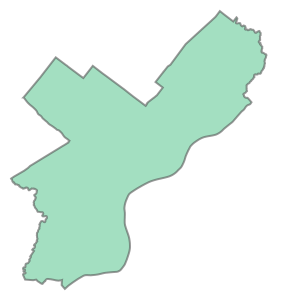

In [57]:
df.geometry.iloc[0]

Success!

#### Converting from a DataFrame to a GeoDataFrame

We can initialize the GeoDataFrame directly from a DataFrame but we need to specify **two things**:

1. The name of the "geometry" column 
2. The CRS of the "geometry" column

::: {.callout-warning title="Watch out!"}

The CRS that you specify when you create the GeoDataFrame must match the CRS of the data. It is **not** the CRS that you wish the data was in. If you would like to convert to a different CRS, you'll need to call the `.to_crs()` after creating your GeoDataFrame.

:::

In this case, the geometry column was saved in Web Mercator EPSG=3857

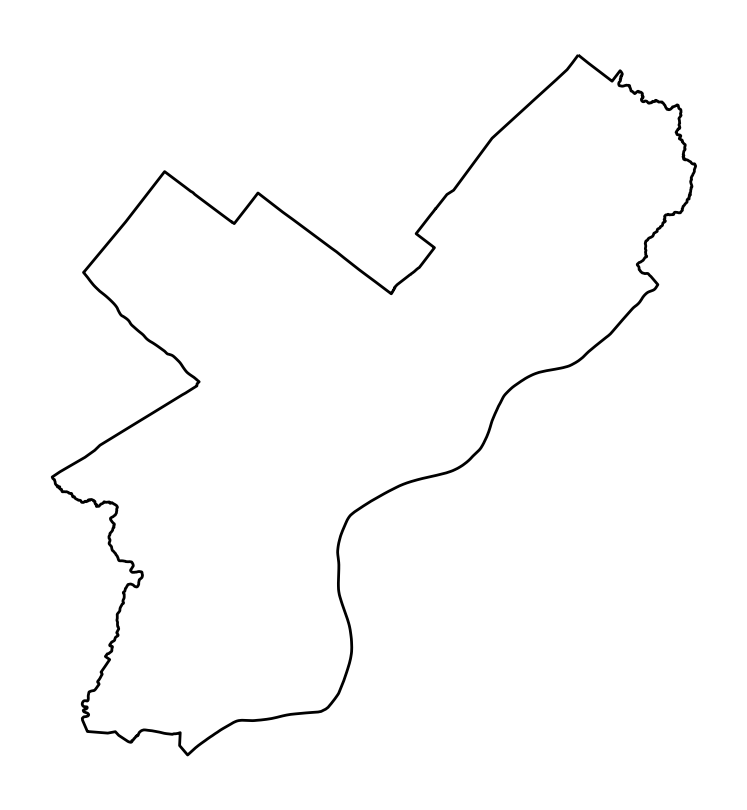

In [64]:
# Make specifying the name of the geometry column and CRS
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:3857")

# Now plot
fig, ax = plt.subplots(figsize=(5, 5))
ax = gdf.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_axis_off()
ax.set_aspect("equal")

#### Let's convert back to 4326 and plot 

The tilt should be a bit more obvious now...

In [ ]:
ax = gdf.to_crs(epsg=4326).plot(facecolor="none", edgecolor="black")

ax.set_axis_off()
ax.set_aspect("equal")

::: {.callout-note}

- I didn't use `plt.subplots()` here to create a figure/axes – I let geopandas automatically make one
- I've chained together the `to_crs()` and `.plot()` functions in one line
- The `.plot()` function returns the axes object that geopandas used to plot — this lets you customizes the axes after plotting

:::

### So, when should you use GeoPandas?

- For exploratory data analysis and visualization, including in Jupyter notebooks
- Pre-processing data to be fed into a desktop GIS program
- For compact, readable, and reproducible code
- If you’re comfortable with Pandas and/or R data frames.

### When it may not be the best tool:

- For polished multilayer map creation — one option is to use a desktop GIS like QGIS.
- If you need very high performance — geopandas can be slow compared to other GIS software.

## Spatial Relationships and Joins

Let's explore joins and merges between GeoDataFrames based on geospatial relationships...

In [65]:
# Load some cities data from the data/ folder
cities = gpd.read_file("./data/ne_110m_populated_places")

In [66]:
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)
...,...,...
238,Rio de Janeiro,POINT (-43.22697 -22.92308)
239,São Paulo,POINT (-46.62697 -23.55673)
240,Sydney,POINT (151.18323 -33.91807)
241,Singapore,POINT (103.85387 1.29498)


<center>
    <img src="imgs/spatial-relationships.png" width=600></img>
</center>

(Image by [Krauss, CC BY-SA 3.0](https://en.wikipedia.org/wiki/Spatial_relation#/media/File:TopologicSpatialRelarions2.png))
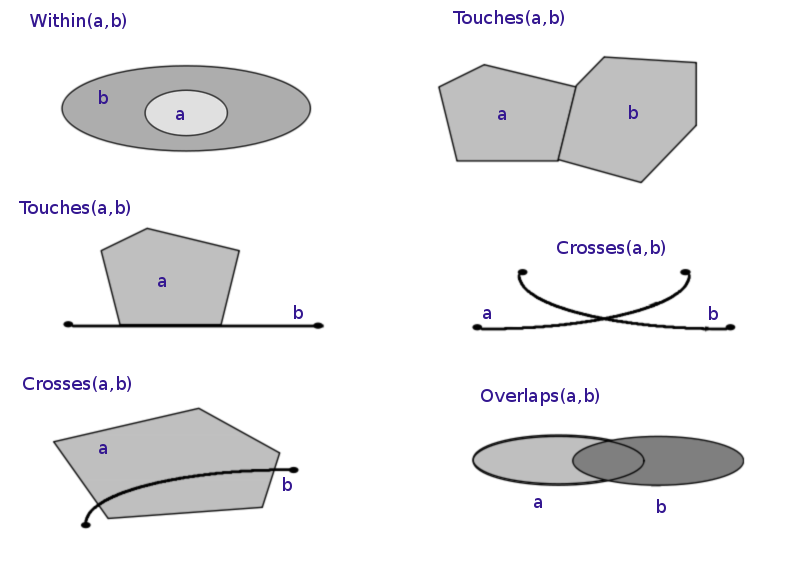

All of these operations are available as functions of a `GeoDataFrame`.

### A quick example

What country is New York in?

**Spoiler**: the USA

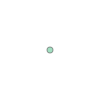

In [67]:
# Select the Point representing New York City
new_york = cities.loc[cities["name"] == "New York"].geometry.squeeze()
new_york

In [68]:
type(new_york)

shapely.geometry.point.Point

In [69]:
countries.contains(new_york)

0      False
1      False
2      False
3      False
4      False
       ...  
172    False
173    False
174    False
175    False
176    False
Length: 177, dtype: bool

In [70]:
# Find the country that contains New York
countries.loc[countries.contains(new_york)]

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
168,USA,United States of America,North America,326625791.0,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


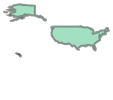

In [71]:
# Get the geometry column of the country containing NYC
USA = countries.loc[countries.contains(new_york)].squeeze().geometry
USA

::: {.callout-note}

The `.loc[]` function can take the index selector as the first argument, and the name of a column as a second argument (separated by a comma)

:::

In [72]:
type(USA)

shapely.geometry.multipolygon.MultiPolygon

In [73]:
# Is New York within the USA?
new_york.within(USA)

True

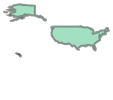

In [74]:
USA

### Reference

The different functions for checking spatial relationships:

- `equals`
- `contains`
- `crosses`
- `disjoint`
- `intersects`
- `overlaps`
- `touches`
- `within`
- `covers`

See [the shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships) for an overview of these methods.

### 1. The spatial join: `sjoin()`


**SPATIAL JOIN** = merging attributes from two geometry layers based on their spatial relationship

Different parts of this operations:

- The GeoDataFrame to which we want add information
- The GeoDataFrame that contains the information we want to add
- The spatial relationship we want to use to match both datasets (**intersects**, **contains**, **within**)
- The type of join: **left** or **inner** join

In this case, we want to join the `cities` dataframe, containing `Point` geometries, with the information of the `countries` dataframe, containing `Polygon` geometries.

To match cities with countries, we'll use the `within` spatial relationship.

The [`geopandas.sjoin()`](https://geopandas.org/reference/geopandas.sjoin.html) function performs this operation:

In [75]:
joined = gpd.sjoin(cities, countries, predicate="within", how="left")

In [76]:
joined.head()

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,62137802.0,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,62137802.0,2221000.0
2,Vaduz,POINT (9.51667 47.13372),9.0,AUT,Austria,Europe,8754413.0,416600.0
3,Lobamba,POINT (31.20000 -26.46667),152.0,SWZ,Swaziland,Africa,1467152.0,11060.0
4,Luxembourg,POINT (6.13000 49.61166),97.0,LUX,Luxembourg,Europe,594130.0,58740.0


As we can see above, the attributes of the cities (left) and countries (right) have been merged based on whether the city is inside the country.

Let's select cities in Italy only:

In [77]:
cities_in_italy = joined.loc[joined["name_right"] == "Italy"]
cities_in_italy

,name_left,geometry,index_right,iso_a3,name_right,continent,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),79.0,ITA,Italy,Europe,62137802.0,2221000.0
1,San Marino,POINT (12.44177 43.93610),79.0,ITA,Italy,Europe,62137802.0,2221000.0
226,Rome,POINT (12.48131 41.89790),79.0,ITA,Italy,Europe,62137802.0,2221000.0


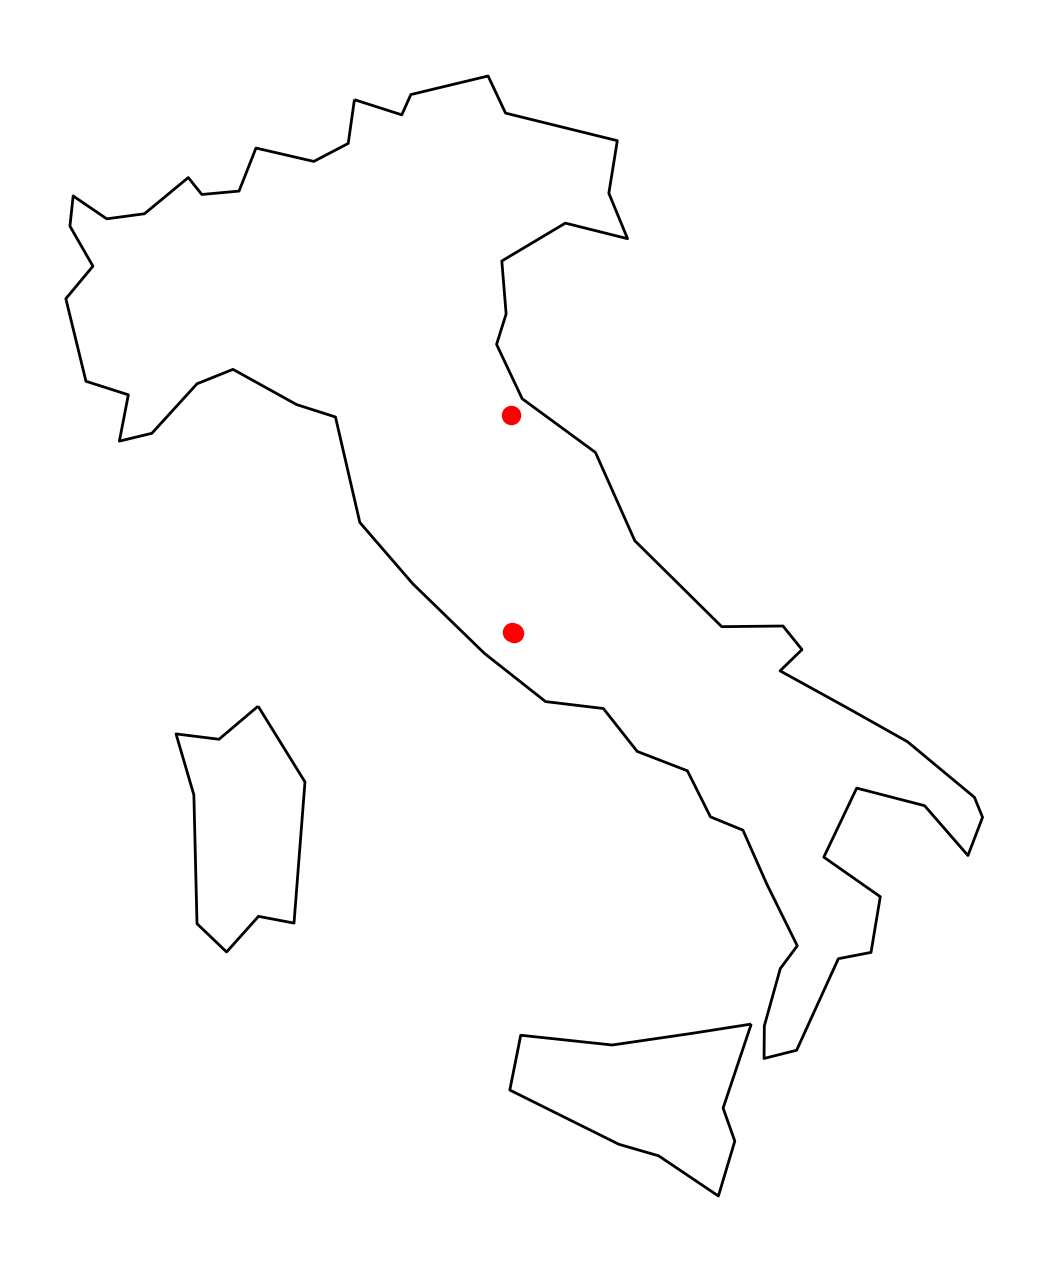

In [78]:
# Extract Italy
italy = countries.loc[countries["name"] == "Italy"]

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
italy.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_axis_off()
ax.set_aspect("equal")

# Plot the first city in the joined data frame (Vatican City)
# Use the same axes by passing in the ax=ax keyword
ax = cities_in_italy.plot(ax=ax, color="red")

### 2. Spatial overlay operation: `overlay()`

We can also perform the "join" operation on the **geometries** rather than just combining **attributes**.

The `overlay()` function combines geometries, e.g. by taking the intersection of the geometries.

Select all countries in Africa:

In [80]:
africa = countries.loc[countries["continent"] == "Africa"]

In [81]:
africa.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
1,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((23.90415 -11.72228, 24.07991 -..."
11,BDI,Burundi,Africa,11466756.0,7892.0,"POLYGON ((29.34000 -4.49998, 29.27638 -3.29391..."
13,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1...."
14,BFA,Burkina Faso,Africa,20107509.0,32990.0,"POLYGON ((2.15447 11.94015, 1.93599 11.64115, ..."
25,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827..."


What is the CRS?

In [84]:
africa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
# Let's transform to a CRS that uses meters
# instead of degrees (EPSG=3857)
africa = africa.to_crs(epsg=3857)

africa.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Plot it:

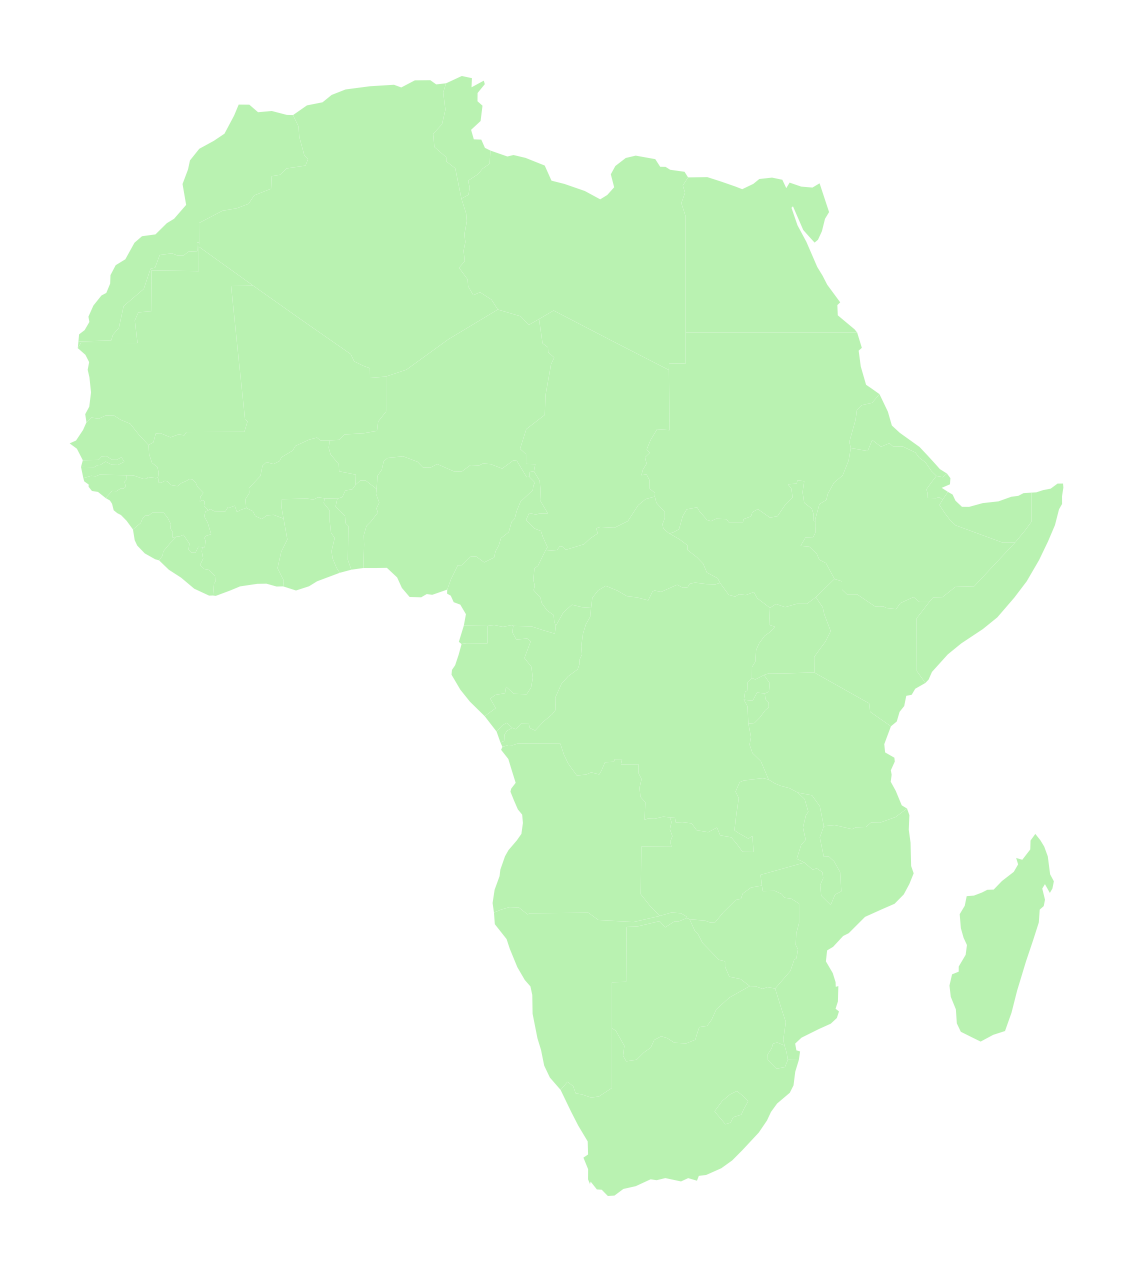

In [86]:
fig, ax = plt.subplots(figsize=(8, 8))

africa.plot(ax=ax, facecolor="#b9f2b1")

ax.set_axis_off()
ax.set_aspect("equal")

In [87]:
# Important CRS needs to match!
cities_3857 = cities.to_crs(epsg=3857)

In [88]:
# Create a copy of the GeoDataFrame
buffered_cities = cities_3857.copy()

# Add a buffer region of 250 km around all cities
buffered_cities["geometry"] = buffered_cities.buffer(250e3)

#### Plot the difference of the two geometries

/Users/nhand/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/nhand/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)


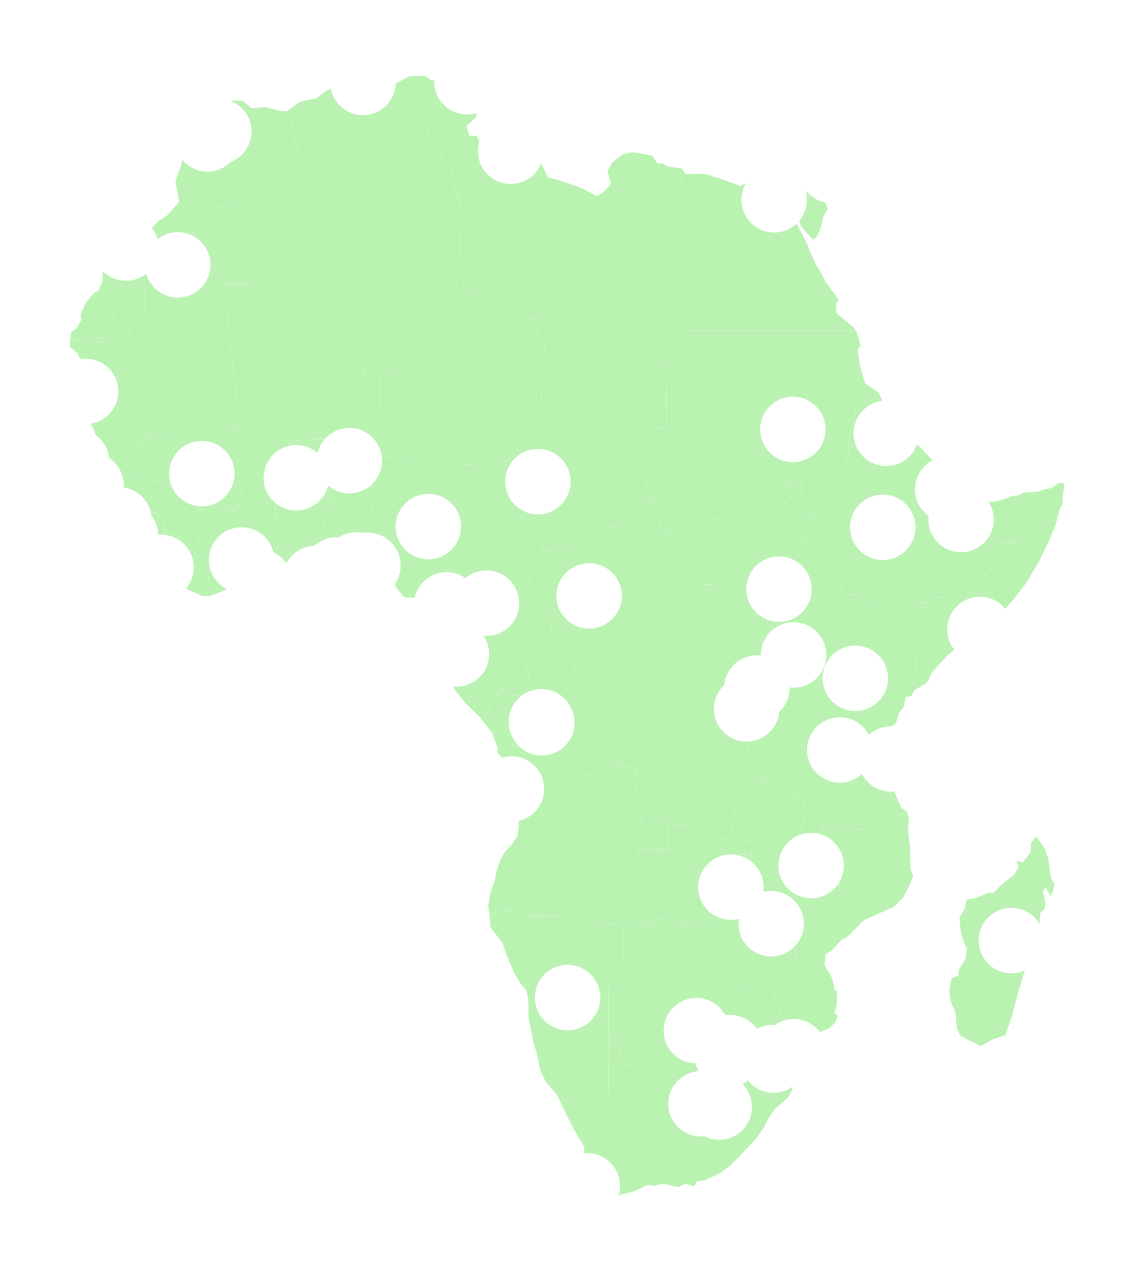

In [93]:
fig, ax = plt.subplots(figsize=(8, 8))

# Calculate the difference of the geometry sets
diff = gpd.overlay(
    africa,
    buffered_cities,
    how="difference",
)

# Plot
diff.plot(facecolor="#b9f2b1", ax=ax)
ax.set_axis_off()
ax.set_aspect("equal")

In [94]:
# Data attributes are the same as the first data frame (africa)
# with an updated geometry column
diff.head()

,iso_a3,name,continent,pop_est,gdp_md_est,geometry
0,AGO,Angola,Africa,29310273.0,189000.0,"MULTIPOLYGON (((2673464.087 -1449571.330, 2441..."
1,BEN,Benin,Africa,11038805.0,24310.0,"POLYGON ((100138.898 1231805.081, 138422.412 1..."
2,BFA,Burkina Faso,Africa,20107509.0,32990.0,"MULTIPOLYGON (((100138.898 1231805.081, 26368...."
3,BWA,Botswana,Africa,2214858.0,35900.0,"POLYGON ((3065120.801 -2659823.621, 3061281.52..."
4,CAF,Central African Rep.,Africa,5625118.0,3206.0,"POLYGON ((1792937.514 836963.765, 1813457.017 ..."


#### Plot the intersection of the two geometries

/Users/nhand/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/nhand/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


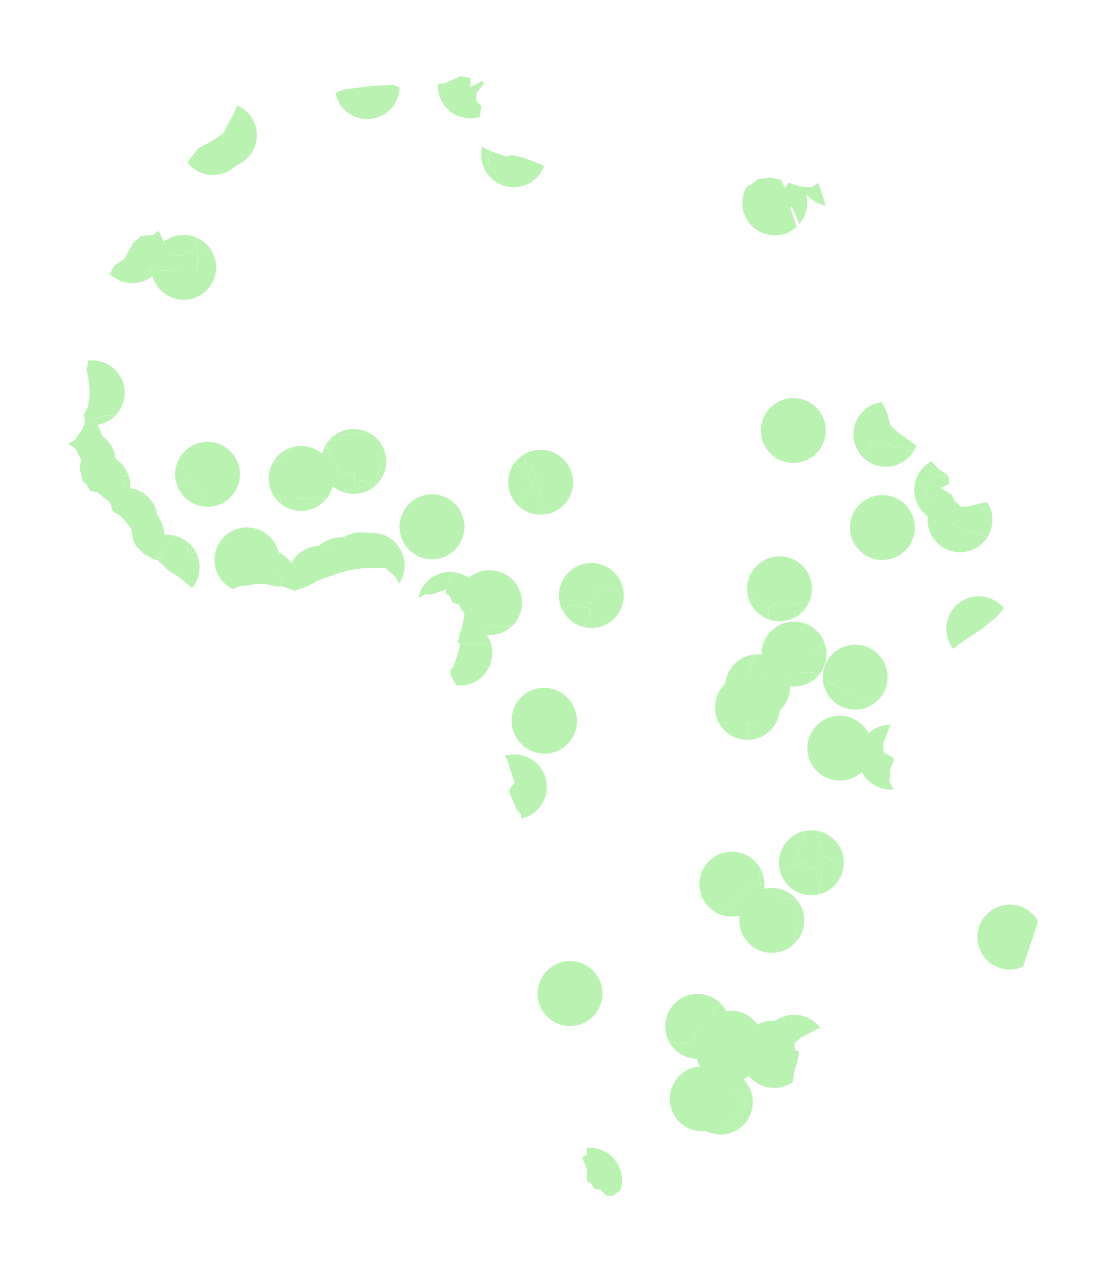

In [95]:
fig, ax = plt.subplots(figsize=(8, 8))

# The intersection of the geometry sets
intersection = gpd.overlay(africa, buffered_cities, how="intersection")

# Plot
intersection.plot(ax=ax, facecolor="#b9f2b1")
ax.set_axis_off()
ax.set_aspect("equal")

### Recap: spatial operations

- **Spatial join**: merge attributes from one data frame to another based on the spatial relationship
- **Spatial overlay**: creating new geometries based on spatial operation between both data frames (and not combining attributes of both data frames)

## That's it!

- We'll continue with geopandas and geospatial data viz next time
- See you on Wednesday!